fingerprint         int64
bssidd             object
signal_strength     int64
location_name      object
dtype: object
(172, 4)
hello
 ["b'00:1b:63:2b:ef:c3'" "b'00:2c:c8:50:a0:f0'" "b'00:2c:c8:50:a0:f3'"
 "b'00:2c:c8:50:a0:f5'" "b'00:2c:c8:50:a0:f6'" "b'00:2c:c8:50:a0:f9'"
 "b'00:2c:c8:50:a0:fa'"]


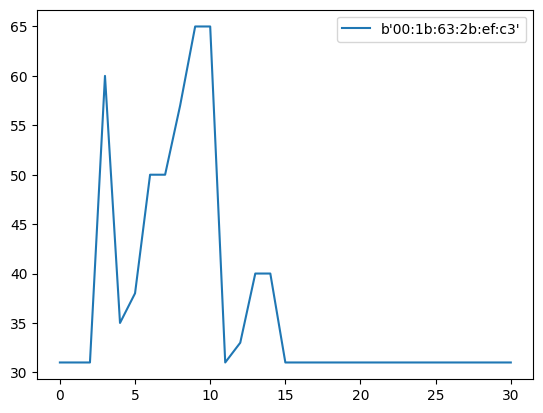

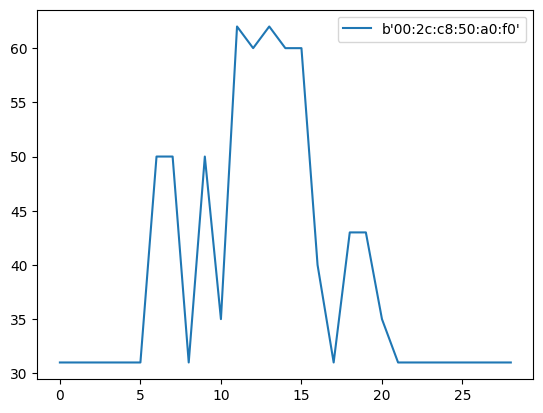

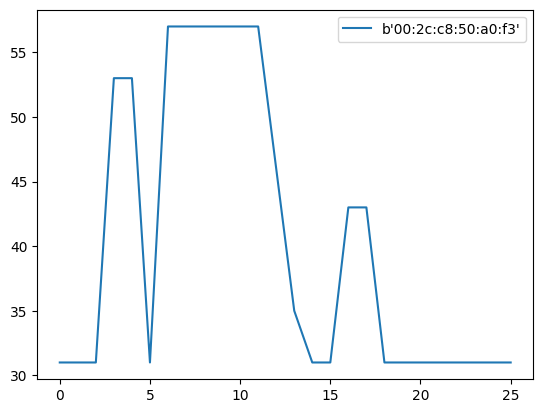

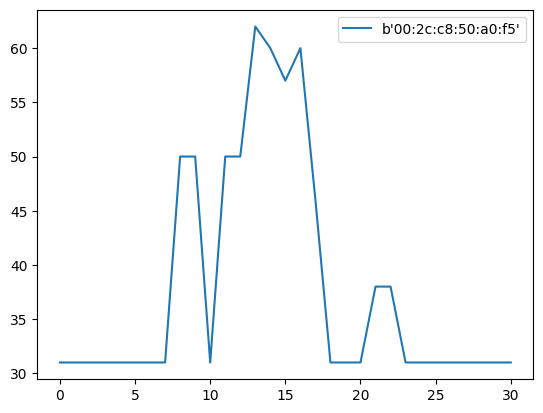

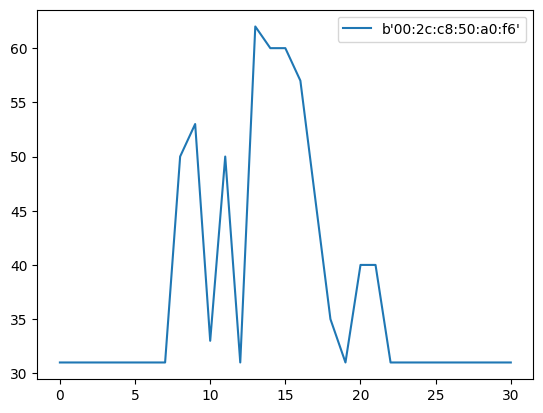

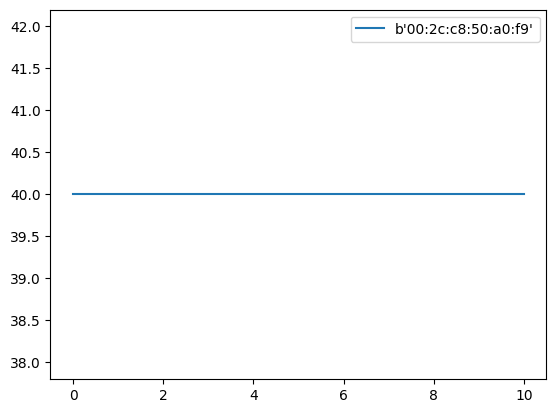

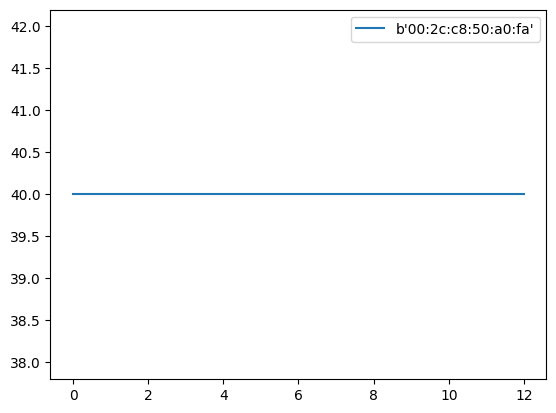

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
config_df = pd.read_csv("data/config.csv")
# fingerprint_count formerly fingerprint_number is the count of
amount_of_fingerprints = config_df.loc[:, 'fingerprint_id'][0]
# fingerprints. fingerprint_id should be the individual id of a fingerprint

ACCESSPOINTS_PATH="data/accesspoints.pkl"
df:pd.DataFrame = pd.read_pickle(ACCESSPOINTS_PATH)
# df=df.iloc[10382:,:]
# df.to_pickle(ACCESSPOINTS_PATH)
# print(df.head())
plt.show()
df.drop(columns=["x-pos","y-pos","ssid","frequency_standard"],inplace=True)


#old format: 
# id fingerprint                bssidd  signal_strength location_name
# 0            0  b'00:be:75:e7:7a:e9'               50  flur0beis117

#new format:
# id location_name                 bssidd  signal_strength 
# 0  flur0beis117    b'00:be:75:e7:7a:e9'               50  
# print(df.shape)
# df=df.loc[df["location_name"]=="flur0beis117"]
# df=df.iloc[10382:,:]
# print(df.head())
df=df.loc[df["bssidd"]<="b'00:2d:c8:50:a0:f3'"]
print(df.dtypes)
print(df.shape)
# plt.scatter(range(len(df)),df.loc["bssidd"])
# df.loc["signal_strength"]
# df=df.loc[df["fingerprint"]==0]
# print(df.head(5))
values=df.loc[:,"bssidd"].values
uniques=np.unique(values)
print("hello\n",uniques)
for bssid in uniques:
    df2=df[df['bssidd']==bssid]
    signal_strenths=df2.loc[:,"signal_strength"].values
    locations=df2.loc[:,"location_name"].values

    # print(df.loc[:,"signal_strength"].values)
    # print(type(df.loc[:,"signal_strength"]))
    plt.plot(range(len(locations)),signal_strenths,label=bssid)
    plt.legend()
    plt.show()